# Image classification

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from openvino.runtime import Core

In [2]:
# Load model
ie = Core()
model = ie.read_model(model='model path')
compiled_model = ie.compile_model(model=model, device_name="CPU")

In [3]:
# model info
input_key = next(iter(compiled_model.inputs))
output_key = next(iter(compiled_model.outputs))
network_input_shape = input_key.shape

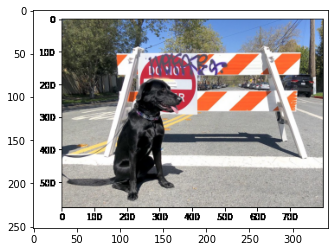

In [4]:
# load image
image = cv2.cvtColor(cv2.imread(filename='./data/coco.jpg'), code=cv2.COLOR_BGR2RGB)

resized_img = cv2.resize(image, dsize=(224, 224))

input_image = np.expand_dims(resized_img, 0)

plt.imshow(image)

In [5]:
# inference

result = compiled_model([input_image])[output_key]
result_index = np.argmax(result)

In [6]:
# Convert the inference result to a class name.
imagenet_classes = open('utils/imagenet_2012.txt').read().splitlines()

# The model description states that for this model, class 0 is background
# so we add background att the beginning of imagenet_classes
imagenet_classes = ['background'] + imagenet_classes

imagenet_classes[result_index]

'n02099601 golden retriever'